In [10]:
#load libraries into python
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import umap
from sklearn import metrics
from sklearn.mixture import GaussianMixture


In [11]:
#load data set into pyton
df = pd.read_csv('mushrooms.csv')

In [12]:
#give heading of data set
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [13]:
#determine if any null values in data set
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
#give descriptive stats of the data set
df.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [15]:
#removes parts of features with low occurances to reduce bias in model
threshold = 100 
for col in df.columns:
    value_counts = df[col].value_counts()
    to_remove = value_counts[value_counts <= threshold].index
    df[col].replace(to_remove, np.nan, inplace=True)
    
df=df.drop(['odor','veil-type','veil-color', 'ring-number', 'gill-attachment'], axis=1)

#get value counts for each column
for col in df.columns:
    print(df[col].value_counts())

put in markdown cell to reduce output cells 

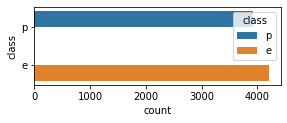

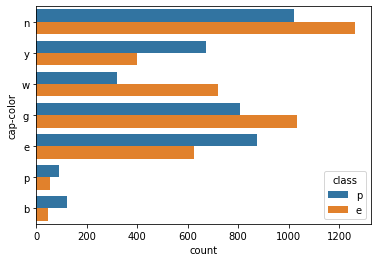

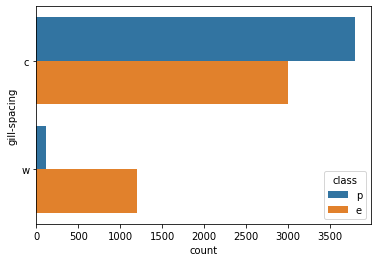

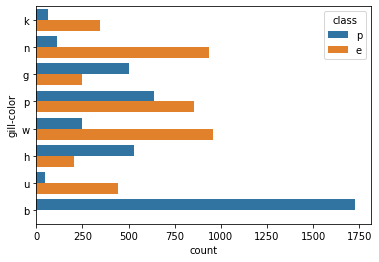

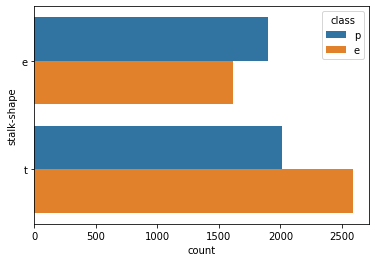

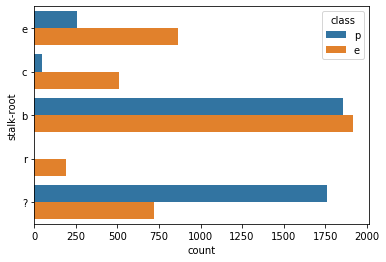

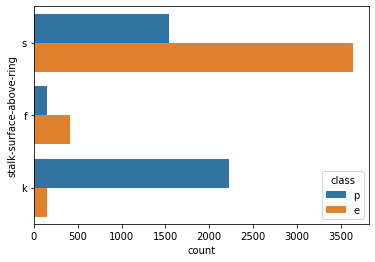

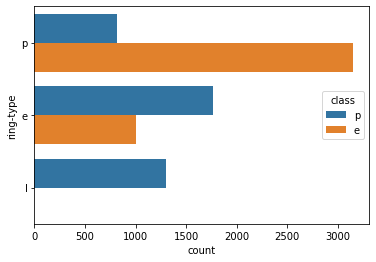

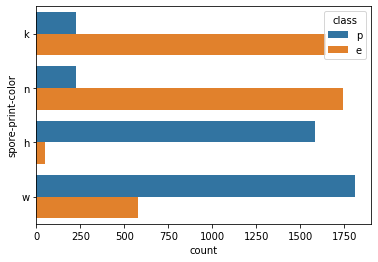

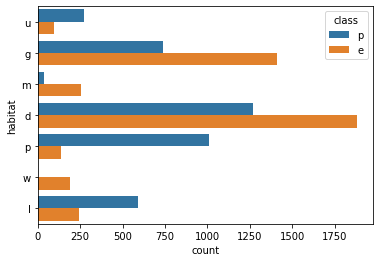

In [17]:
#create a histogram for each feature and further split into mushroom class
fig = plt.figure(figsize=(15,10))
i=1
for col in df.columns:
    fig.add_subplot(6,3,i)
    sns.countplot(y=col, hue='class', data=df)
    i=i+1
    plt.show()

In [18]:
#make data set all numerical values instead of categorical
df = pd.get_dummies(df,drop_first=True)

In [19]:
#show new data set look
df

class_p  cap-shape_f  cap-shape_k  cap-shape_x  cap-surface_s  \
0           1            0            0            1              1   
1           0            0            0            1              1   
2           0            0            0            0              1   
3           1            0            0            1              0   
4           0            0            0            1              1   
...       ...          ...          ...          ...            ...   
8119        0            0            1            0              1   
8120        0            0            0            1              1   
8121        0            1            0            0              1   
8122        1            0            1            0              0   
8123        0            0            0            1              1   

      cap-surface_y  cap-color_e  cap-color_g  cap-color_n  cap-color_p  ...  \
0                 0            0            0            1            0  ...   
1                 0            0            0            0            0  ...   
2                 0            0            0            0            0  ...   
3                 1            0            0            0            0  ...   
4                 0            0            1            0            0  ...   
...             ...          ...          ...          ...          ...  ...   
8119              0            0            0            1            0  ...   
8120              0            0            0            1            0  ...   
8121              0            0            0            1            0  ...   
8122              1            0            0            1            0  ...   
8123              0            0            0            1            0  ...   

      population_n  population_s  population_v  population_y  habitat_g  \
0                0             1             0             0          0   
1                1             0             0             0          1   
2                1             0             0             0          0   
3                0             1             0             0          0   
4                0             0             0             0          1   
...            ...           ...           ...           ...        ...   
8119             0             0             0             0          0   
8120             0             0             1             0          0   
8121             0             0             0             0          0   
8122             0             0             1             0          0   
8123             0             0             0             0          0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
0             0          0          0          1          0  
1             0          0          0          0          0  
2             0          1          0          0          0  
3             0          0          0          1          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
8119          1          0          0          0          0  
8120          1          0          0          0          0  
8121          1          0          0          0          0  
8122          1          0          0          0          0  
8123          1          0          0          0          0  

[8124 rows x 58 columns]

In [20]:
#descriptive stats of new data set
df.describe()

class_p  cap-shape_f  cap-shape_k  cap-shape_x  cap-surface_s  \
count  8124.000000  8124.000000  8124.000000  8124.000000    8124.000000   
mean      0.482029     0.387986     0.101920     0.450025       0.314623   
std       0.499708     0.487321     0.302562     0.497527       0.464394   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000     0.000000     0.000000       0.000000   
75%       1.000000     1.000000     0.000000     1.000000       1.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       cap-surface_y  cap-color_e  cap-color_g  cap-color_n  cap-color_p  ...  \
count    8124.000000  8124.000000  8124.000000  8124.000000  8124.000000  ...   
mean        0.399311     0.184638     0.226489     0.281142     0.017725  ...   
std         0.489787     0.388028     0.418585     0.449584     0.131959  ...   
min         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%         0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%         1.000000     0.000000     0.000000     1.000000     0.000000  ...   
max         1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       population_n  population_s  population_v  population_y    habitat_g  \
count   8124.000000   8124.000000   8124.000000   8124.000000  8124.000000   
mean       0.049237      0.153619      0.497292      0.210734     0.264402   
std        0.216375      0.360605      0.500023      0.407855     0.441041   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        0.000000      0.000000      0.000000      0.000000     0.000000   
50%        0.000000      0.000000      0.000000      0.000000     0.000000   
75%        0.000000      0.000000      1.000000      0.000000     1.000000   
max        1.000000      1.000000      1.000000      1.000000     1.000000   

         habitat_l    habitat_m    habitat_p    habitat_u    habitat_w  
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000  
mean      0.102413     0.035943     0.140817     0.045298     0.023634  
std       0.303209     0.186159     0.347854     0.207969     0.151914  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 58 columns]

In [21]:
#set feature set and target set
#set x and y train/test splits
y = df.iloc[:,0]
x= df.iloc[:,1:]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

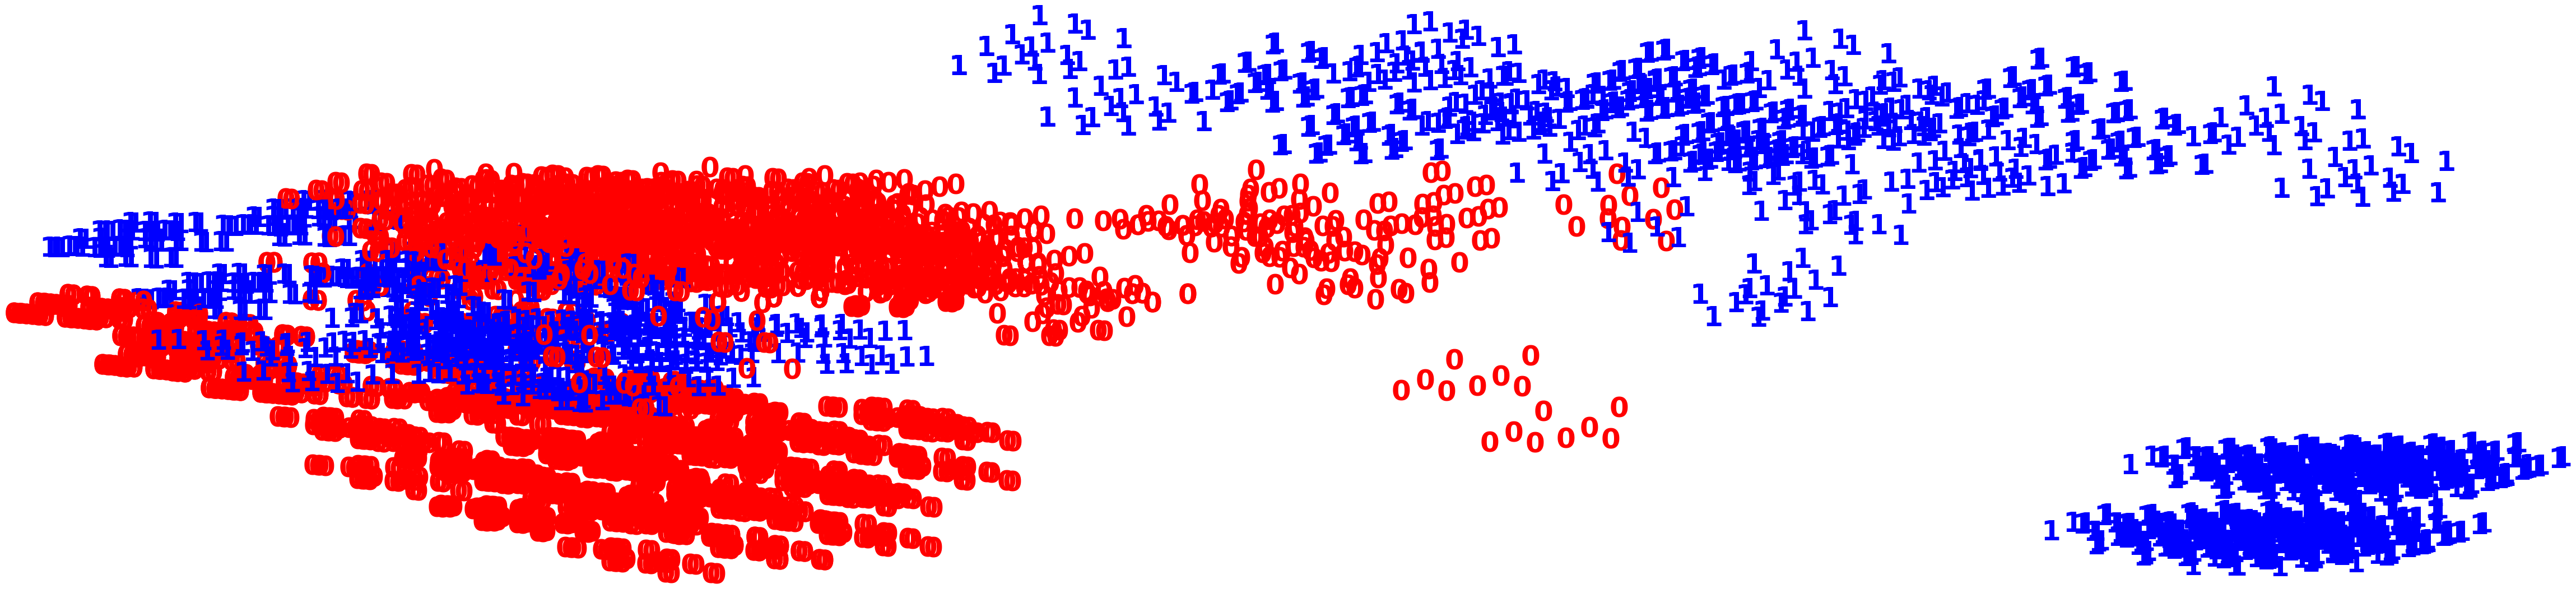

In [22]:
#initialize pca so we can visualize the clusters
pca = PCA(n_components=2)

x_pca = pca.fit_transform(x)

#plot PCA cluster
plt.figure(figsize=(20,5))
colors = ['r','b']
for i in range(x_pca.shape[0]):
    plt.text(x_pca[i, 0], x_pca[i, 1], str(y[i]), color=colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

While we can see that the red clusters are mostly on the left and the blue clusters are on the right, there is a big chunk of blue clusters within the red cluster. 

In [23]:
#use tsne dimensional reduction on data and graph the clusters
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(10,5))
colours = ['r','b']
for i in range(x_tsne.shape[0]):
    plt.text(x_tsne[i, 0], x_tsne[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.074s...
[t-SNE] Computed neighbors for 8124 samples in 5.963s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.889610
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.242004
[t-SNE] KL divergence after 300 iterations: 2.479133


In [27]:
#use tsne dimensional reduction on data and graph the clusters
tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=300)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(10,5))
colours = ['r','b']
for i in range(x_tsne.shape[0]):
    plt.text(x_tsne[i, 0], x_tsne[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.085s...
[t-SNE] Computed neighbors for 8124 samples in 7.452s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 1.028354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.821251
[t-SNE] KL divergence after 300 iterations: 1.932618


In [25]:
#use tsne dimensional reduction on data and graph the clusters
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=300)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(10,5))
colours = ['r','b']
for i in range(x_tsne.shape[0]):
    plt.text(x_tsne[i, 0], x_tsne[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.084s...
[t-SNE] Computed neighbors for 8124 samples in 5.446s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 0.789347
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.596283
[t-SNE] KL divergence after 300 iterations: 2.939664


We can see above that a perplexity level of 20 it is not quite clear where the clusters are. There is a mix of them on both the left/right and top/bottom. With the perplexity of lvl 40 we can make out the clusters a bit better where one clsuter main lies on the left while the other is mostly on the right. At perplexity of level 100, the clusters are not very clear and look similar to perplexity level 20. Out of the t-sne dimension reduction, the best seems to be level 40.  

In [26]:
#initiate umap dimensional reduction and graph the clusters
x_umap = umap.UMAP(n_neighbors=2,
                      min_dist=0.3,
                      metric='correlation').fit_transform(x)

plt.figure(figsize=(10,5))
colours = ['r','b']
for i in range(x_umap.shape[0]):
    plt.text(x_umap[i, 0], x_umap[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../usr/local/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/usr/local/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../usr/local/lib/python3.7/site-packages/umap

The umap dimensional reduction using umap is also not very clear. We can see that most of the red clusters are on the left and most of the blue clusters are on the right. In the middle however there is not a clear separation between the two clusters. Out of all of these, the t-sne with perplexity lvl 40 seems to be the best.

In [290]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(x_train)
y_pred = kmeans_cluster.predict(x_test)

#print metric data for kmeans cluster
print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y_test, y_pred)))
print(metrics.silhouette_score(x_test, y_pred, metric='euclidean'))

142 ms ± 7.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
ARI for two cluster k-means: 0.5885964955584934
0.15308779503200462


In [293]:
#define agglomerative cluster 
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=2, radnom_state=123)

# Fit model
y_pred = agg_cluster.fit_predict(x)

#print metric data for kmeans cluster
print("ARI for agglomerative clustering: {}".format(
    metrics.adjusted_rand_score(y, y_pred)))
print(metrics.silhouette_score(x, y_pred, metric='euclidean'))

ARI for agglomerative clustering: 0.1301072563263591
0.08376376555759324


In [294]:
# Defining the dbscan clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

# Fit model
y_pred = dbscan_cluster.fit_predict(x)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, y_pred)))
print(metrics.silhouette_score(x, y_pred, metric='euclidean'))

ARI for two cluster k-means: 0.26673767587371633
0.15773483947773126


In [295]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
y_pred = gmm_cluster.fit_predict(x)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, y_pred)))
print(metrics.silhouette_score(x, y_pred, metric='euclidean'))

ARI for two cluster k-means: 0.006291968571898406
0.10213836530528848


While none of the models seems to perform particularly well, the K-means clustering performed best with an adjusted ARI of 0.589. This is considerably higher than the other clustering techniques. The silhouette score of the dbscan clustering is the highest, but having an adjusted ARI score of 0.267 makes it inferior to k-means cluster.